<a href="https://colab.research.google.com/github/nguyen084/Logistic-Regression/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hieu Nguyen**\
CSE 5095-018 Spring 2020\
Homework 1\
Due: February 18, 2020

Excercise 1 [40 point] Mathematical Background \
1. (5 points) Let $A,B \in \mathbb{R}^{mxn}$. What is an equivalent expression to $(AB)^T$? \
**$${(AB)^T = B^TA^T}$$**
2. (10 points) Consider the set of points $ {x \in \mathbb{R}^2:||x||_p = 1} $.\
a. Plot this set of points for $p=2$. This is the unit sphere in $L^2$.**Answer: See plot with blue points** \
b. On the same figure, plot the unit sphere in $L^1$. **Answer: See plot with red points**\
c. Again on the same plot, do the same for $p = \infty$. **Answer: See plot with green points** \
d. What do you notive about the unit spheres as $p$ increase from $1$ to $\infty$. **Answer: The sphere got wider**

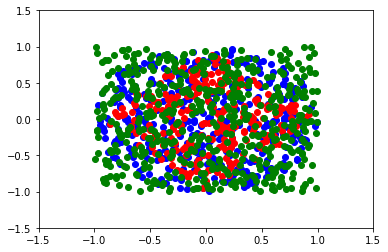

In [51]:
import matplotlib.pyplot as plt #import matplot library 
import numpy as np #import numpy library
def plotnorm(p,color):
  for i in range(500):
    x = np.array([np.random.rand()*2-1,np.random.rand()*2-1]) #making x,y points from -1 to 1
    if np.linalg.norm(x,p) < 1: #plot if the point is in the L2 norm
      plt.plot(x[0],x[1],color)
plotnorm(2,'bo')
plotnorm(1,'ro')
plotnorm(np.inf,'go')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

3. (10 points) The trace of a square matrix, $tr(A)$, is an important operation on matries. \
a. Let $A \in \mathbb{R}^{nxn}$. What is the definition of $tr(A)$? **Answer: Trace of the square matrix A is the sum of the elements on the main diaganol of $A$ such that $tr(A) = \sum^n_{i=1}a_{ii}$ where $a_{ii}$ denotes the element of the ith row and ith column of $A$.** \
b. Let $A,B \in \mathbb{R}^{nxn}$ be two square matrices. How can $tr(A^TB)$ be express as the dot product of two vectors? \
**Answer: Follow the four properties of inner product, we can prove as the following:**\
Source: http://mathworld.wolfram.com/InnerProduct.html   
i) For every $A = (A_{ij}) \in \mathbb{R}^{mxn}$ we have: 
$$\langle A,A\rangle = tr(A^TA)=\sum_{i=1}^n(A^TA)_{ii}=\sum_{i=1}^n\sum_{j=1}^mA_{ij}^TA_{ji}=\sum_{i=1}^n\sum_{j=1}^mA{ij}^2 \geq 0$$
and $\langle A,A \rangle = 0 \iff (A_{ij} = 0)$ \
ii) For $A,B,C \in \mathbb{R}^{nxn}$, and  $\alpha \in \mathbb{R}$, we have: \
$$\langle A,B \rangle = tr(B^TA) = tr((B^TA)^T)=tr(A^TB)=\langle B,A \rangle$$
iii) 
$$\langle A +B,C \rangle = tr(C^T( A + B)) = tr( C^TA + C^TB) = tr(C^TA) + tr(C^TB) = \langle A,C\rangle + \langle B,C \rangle$$
iv) $$\langle \alpha A,B \rangle = tr(\alpha B^TA)=\alpha tr(B^TA) = \alpha \langle A,B\rangle$$
Since all four of the properties of inner product is satistified, $tr(A^B) is the inner product of the two vectors. 

4. (10 points) Consider the multivariate quadratic function:
$$ f(x) = \frac{1}{2}x^T \begin{bmatrix}2&3\\1&2 \end{bmatrix}x+\begin{bmatrix}1\\2\end{bmatrix}^Tx+1$$
a) What is the gradient $\nabla f$?
**Based on the formalation of matrix gradient with the form of $\nabla f = \frac{1}{2}(A+A^T)x+b$**, we get:
$$\nabla f = \frac{1}{2}\left(\begin{bmatrix}2 & 3 \\ 1 & 2 \end{bmatrix} + \begin{bmatrix}2 & 1 \\ 3 & 2 \end{bmatrix}\right) x + \begin{bmatrix}1 \\ 2 \end{bmatrix}
\\ = 2 \begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix}x +  \begin{bmatrix}1 \\ 2 \end{bmatrix} $$ 
b) What is the Hessian $\nabla^2f$?
**$$\nabla^2f = 2\begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix} $$**

5. (5 points) Suppose we are solving a minimization problem. In gradient descent, at every
iteration we need to calculate the gradient ∇f evaluated at xn in order to compute
the next guess $x_{n+1} = x_n − \alpha\nabla f(x_n)$. When using Newton’s method to minimize a
function $f$ by finding its critical points where $\nabla f = 0$, at every iteration in addition
to $\nabla f(x_n)$ what additional information about $f$ at $x_n$ do we need to calculate in order
to compute $x_n+1$?
**We need to also calculate the Hessian of $f$ at $x_n$ according to the Newton's formula:**
$$x_{k+1}=x_k-\frac{f'(x_k)}{f''(x_k)}$$

**Excercise 2 [60 points]** Logistic Regression
1. (10 points)  Recall that in logistic regression, we have the model:
$$ P(y=1|x;\theta)  = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}$$
a. Suppose $x,\theta \in \mathbb{R}$. Plot $h\theta(x) = g(\theta^Tx)$ for $\theta$ = 1, 2, and 5 on the same plot. How
does the shape of g change as θ increases? What is the shape of $h\theta(x) = g(\theta^T x)$
in the limit $\theta → \infty$?
**The sigmoid curve get narrower as $\theta$ increases. The shape of the sigmoid funcion looks like a step function as $\theta \to \infty$**.

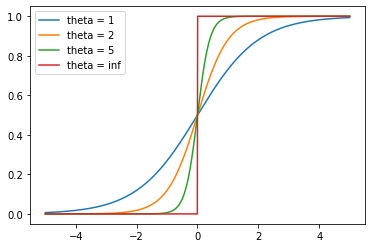

In [52]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x,theta):
  h = np.dot(x,theta)
  return 1./(1+np.exp(-h))
x = np.linspace(-5,5,1000)
y1 = sigmoid(x,1)
y2 = sigmoid(x,2)
y5 = sigmoid(x,5)
yin = sigmoid(x,np.inf)
plt.plot(x,y1,label = 'theta = 1')
plt.plot(x,y2,label = 'theta = 2')
plt.plot(x,y5,label = 'theta = 5')
plt.plot(x,yin,label = 'theta = inf')
plt.legend()
plt.show()

b. When the training data are linearly separable (there exists a line/hyperplane
that perfectly separates the labeled data into different classes), we maximize the
likelihood of the data by choosing θ so that any positive distance from the decision
boundary corresponds to $P(y = 1|x; \theta) = 1$ and any negative distance corresponds
to $P(y = 1|x; \theta) = 0$. Another way to say this is that we want to find θ such that
$g(\theta^T x) = 1$ whenever $θ^T x > 0$, and $g(\theta^T x) = 0$ whenever $\theta^T x < 0$. What $\theta$ gives
this model? (Hint: see plots above.) \

• Note this shows logistic regression does not converge when the
training data are linearly separable. In practice, data are rarely linearly separable, but there are also different ways to modify logistic regression
to take the separable case into account, which we will return to when we
discuss regularization. \
**Answer: Use the hint from the graph above, we need to set $\theta \to \infty$**

2. (20 points) Recall that for $m$ datapoints $(x^i,y^i)$ where $x\in\mathbb{R}^n$ is the feature vector, $y \in {0,1}$ is the class label, and $i=1,...,m$ is the index of the datapoint, the log likelihood for logistic regression is
$$\ell(\theta) = \sum_{i=1}^my^ilogh_\theta(x^i)+(1-y^i)log(1-h_\theta(x^i))$$
where $h_\theta x^i = g(\theta^Tx^i)$.


a. Let $m=1$ so that we consider only the log likelihood of the single datapoint $(x,y)$. Use the known fact that $g'(z) = g(z)(1-g(z))$ to show that:
$$ \frac{\partial}{\partial\theta_j}\ell(\theta)=(y-h_\theta(x))x_j$$
**Note that this gives us the $j^{th}$ element of the gradient $\nabla_\theta\ell$**
$$\ell(\theta) = ylog(g(\theta^Tx)+(1-y)log(1-g(\theta^Tx)) \\ \frac{\partial}{\partial\theta_j}\ell(\theta)= \frac{yg'(\theta^Tx)}{g(\theta^Tx)}-\frac{(1-y)(g'(\theta^Tx))}{1-g(\theta^Tx)}\\
=\frac{yg(\theta^Tx)(1-g(\theta^Tx)x_j}{g(\theta^Tx)}-\frac{(1-y)(g(\theta^Tx)(1-g(\theta^Tx)x_j)}{1-g(\theta^Tx)}\\
=y(1-h_\theta(x))x_j-(1-y)h_\theta(x)x_j\\
=(y-yh_\theta(x)-h_\theta(x)+yh_\theta(x))x_j\\
=(y-h_\theta(x))x_j$$
b. What is the expression for gradient for abitrary $m$?
$$ \frac{\partial}{\partial\theta}\ell(\theta)=\sum_{i=1}^m(y^i-h_\theta(x^i))x^i$$

3. (30 points) Download the files xvals.dat and yvals.dat included in the homework.
The first contains the features and the second contains the labels for 99 datapoints. \
(a) Save the data from xvals.dat in a matrix, X. Each row of xvals.dat corresponds to a datapoint, and each column corresponds to a feature. In this dataset,
how many features does each datapoint have? \


In [53]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir(r'/content/gdrive/My Drive/Academic/UCONN/MATH5095Machine Learning/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
import numpy as np
x = np.loadtxt('q1x.dat')
y = np.loadtxt('q1y.dat')
print('Number of features of the dataset is ',x.shape[1])

Number of features of the dataset is  2


(b) Something we did not go into detail in class is that in general, the decision boundary separating the two classes does not pass through the origin. Therefore, the
linear model $\theta^Tx = 0$ for the decision boundary actually implicitly includes an
intercept term $\theta_0$. Let $[x1, x2]$ be the feature vector describing a given datapoint.
Then in logistic regression, we add a constant feature 1 to the feature vector in
order to get an intercept term:
$$ \theta^Tx = \begin{bmatrix}\theta_0 & \theta_1 & \theta_2\end{bmatrix}\begin{bmatrix}1\\x_1\\x_2\end{bmatrix}=\theta_0+\theta_1x_1+\theta_2x_2$$
Add this constant feature to your matrix $X$.

In [0]:
intercept = np.ones((x.shape[0], 1))
x = np.hstack((intercept, x))

c. Use your answer from part 2(a) above to write code for finding $\theta^*$
that maximizes
the log likelihood using gradient ascent. Start from an initial guess of $\theta = 0$
(the vector of all zeros), and stop when $||\nabla_\theta\ell_2|| \leq 10^{-6}$
(the tolerance we’re using
to approximate the condition $\nabla_\theta\ell = 0$).

In [0]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
def logistic_regression(features, target, learning_rate):
    weights = np.zeros(features.shape[1])
    gradient = np.dot(features.T, target)
    step = 0
    while np.linalg.norm(gradient,2) > 10e-6:
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        # Print log-likelihood every so often
        step += 1
        if step > 200000:
          print('Too many steps, not converging!')
          return
    print('Number of steps: ',step)
    return weights

In [59]:
#i) Use a learning rate of 0.01. How many steps?
weights1 = logistic_regression(x, y, learning_rate = 0.01)

Number of steps:  740


In [60]:
#ii) Use a learning rate of 0.1. How many steps?
weights2 = logistic_regression(x, y, learning_rate = 0.1)
# After 200,000 step, the model is not converging. 

Too many steps, not converging!


In [61]:
#iii) Use a learning rate of 0.001. How many steps?
weights3 = logistic_regression(x, y, learning_rate = 0.001)

Number of steps:  7661


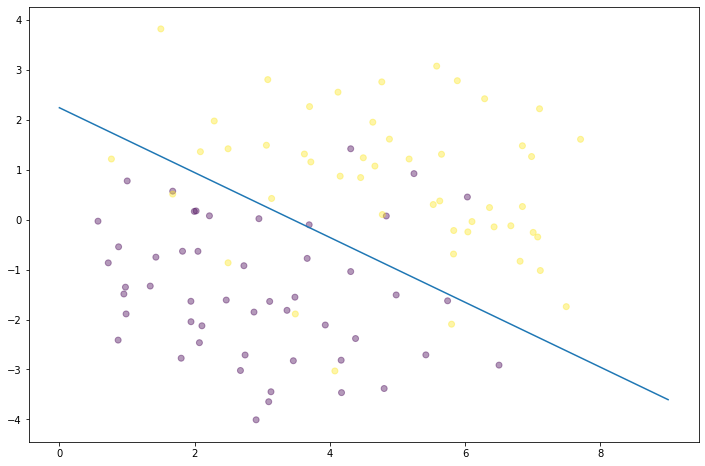

In [62]:
#d) Plot the data, using different colors for each label, and the decision boundary that you found in part 3c.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
x1 = np.array(range(10))
x2 = (-weights3[0] - weights3[1]*x1)/weights3[2]
plt.plot(x1,x2)
plt.scatter(x[:, 1], x[:, 2],c = y, alpha = .4)

In [0]:
#e  Now let’s make a prediction on a new datapoint [2 1]
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)
predictpoint = predict(np.array([1,2,1]),weights3)

Probability of 1:  0.51803744079086
Probability of 0:  0.48196255920914
Therefore, we predict y to be 1 for this data point


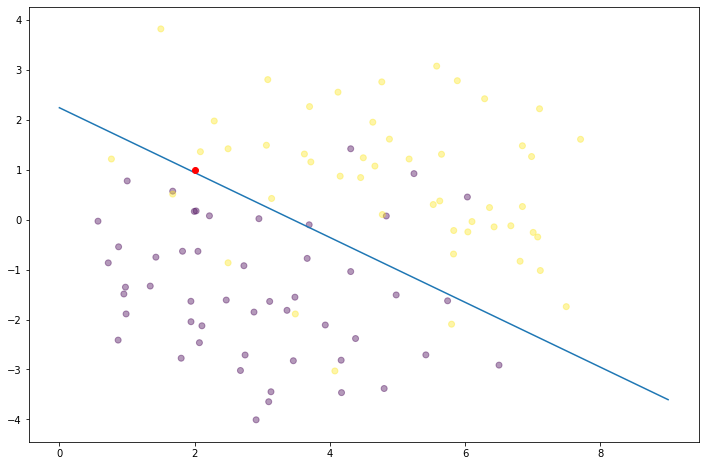

In [85]:
print('Probability of 1: ', predictpoint)
print('Probability of 0: ', 1-predictpoint)
print('Therefore, we predict y to be 1 for this data point')
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
x1 = np.array(range(10))
x2 = (-weights3[0] - weights3[1]*x1)/weights3[2]
plt.plot(x1,x2)
plt.plot(2,1,'ro')
plt.scatter(x[:, 1], x[:, 2],c = y, alpha = .4)